# 簡易日射モデル

簡単な試算のために日射データを引っ張ってくるのは大げさなので、簡易日射モデルを考えたい。

## 太陽高度

**太陽赤緯 $\delta$**は0度として扱う。すなわち、春分および秋分のひとの太陽赤緯と等しい。

真太陽時と平均太陽時の時刻のずれ**均時差**も0とする。ずれはないとする。

**時角** も地点を日本標準時の明石市(経度135度、緯度35度)ととらえれば、時刻の15倍で済む。

したがって、

$t = 15 h - 180$

$sin(h) = sin(\varphi) sin(\delta) + cos(\varphi) cos(\delta) cos(t)$

すなわち、

$h = sin^{-1} \{ cos(135) cos(15h) \} $


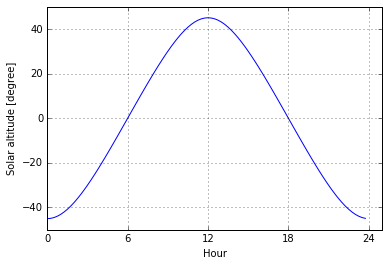

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from math import pi, cos, asin, sin, log

def get_h(Ts):
    return asin(cos(135 * pi / 180) * cos((15 * Ts) * pi / 180)) * 180 / pi

hours = [i/4.0 for i in range(24*4)]
plt.plot(hours, [get_h(h) for h in hours])

plt.xlabel("Hour")
plt.ylabel("Solar altitude [degree]")
plt.xticks([0,6,12,18,24])
plt.grid()
plt.show()

## 日射量

直達日射量$J_{dh}$と天空日射量$J_{sh}$をブーガの式およびベルラーゲの式から求める。

$J_{dh} = J_0 P^{\frac{1}{sin h}} $

$J_{sh} = \frac{1}{2} J_0 sin h \frac{1 - P^{\frac{1}{sin h}}}{1 - 1.4 ln P}$

ここで、 太陽定数 $J_0$ = 1353 、大気透過率$P$ = 0.65 とする。



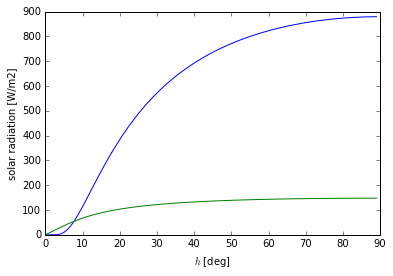

In [2]:
J0 = 1353.0 #太陽定数
P = 0.65 #大気透過率
eps = 0.000001   #安定化定数

def get_Jdh(h):
    return J0 * pow(P, 1.0/(eps+sin(h * pi/180)))

def get_Jsh(h):
    return 0.5 * J0 * sin(h * pi/180) * (1.0-pow(P, 1.0/(eps+sin(h * pi/180))))/(1.0 - 1.4 * log(P))

h_rad = range(90)
plt.plot(h_rad, [get_Jdh(h) for h in h_rad], label="$J_{dh}$")
plt.plot(h_rad, [get_Jsh(h) for h in h_rad], label="$J_{sh}$")

plt.ylabel("solar radiation [W/m2]")
plt.xlabel("$h$ [deg]")


## 式をひとまとめにする

使いやすさのためにまとめます。

$h = sin^{-1} \{ cos(135) cos(15h) \} $

$J_{dh} = J_0 P^{\frac{1}{sin h}} $

$J_{sh} = \frac{1}{2} J_0 sin h \frac{1 - P^{\frac{1}{sin h}}}{1 - 1.4 ln P}$


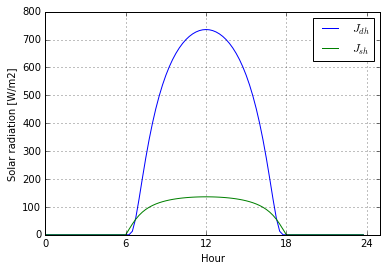

In [3]:
def get_J(Ts, P = 0.65, J0=1353.0):
    eps = 0.000001   #安定化定数
    h = max(0, asin(cos(135 * pi / 180) * cos((15 * Ts) * pi / 180))) #太陽高度[rad]
    return J0 * pow(P, 1.0/(eps+sin(h))), 0.5 * J0 * sin(h) * (1.0-pow(P, 1.0/(eps+sin(h))))/(1.0 - 1.4 * log(P))

hours = [i/4.0 for i in range(24*4)]
plt.plot(hours, [get_J(h)[0] for h in hours], label="$J_{dh}$")
plt.plot(hours, [get_J(h)[1] for h in hours], label="$J_{sh}$")

plt.xlabel("Hour")
plt.ylabel("Solar radiation [W/m2]")
plt.xticks([0,6,12,18,24])
plt.grid()
plt.legend(loc="upper right")
plt.show()

## 簡易外気温度

簡易日射量から簡易外気温を計算するモデルを考える。

日射が地上物に吸収されたのちに、外気温にその影響が顕在化するまでには時差がある。
この時差を適当な応答係数を用いて表現する。




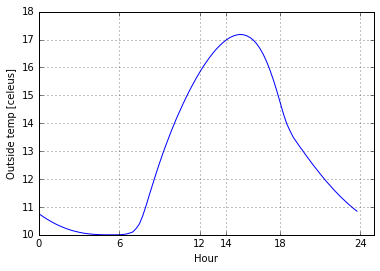

In [16]:
def get_T(Ts):
    J = [get_J((Ts-x + 24)%24) for x in range(12)]
    r = [0.05, 0.4, 0.1, 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01]
    return sum([sum(J[i]) * r[i] for i in range(12)])/100+10

hours = [i/4.0 for i in range(24*4)]
plt.plot(hours, [get_T(h) for h in hours])

plt.xlabel("Hour")
plt.ylabel("Outside temp [celeus]")
plt.xticks([0,6,12,14,18,24])
plt.grid()
plt.show()